#EDA Assignment

Assignment Code: DA-AG-009

In [4]:
#1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('BIKE DETAILS.csv')
df.head()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [5]:
#2. Check for missing values in all columns and describe your approach for handling them.


missing = df.isnull().sum()
print("Missing values per column:\n", missing)
print("\nPercentage missing:\n", (missing / len(df) * 100).round(2))

# Approach for missing values:
# - Drop or impute ex_showroom_price since it has high missing ratio (~41%).
# - Other columns are complete.

Missing values per column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage missing:
 name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


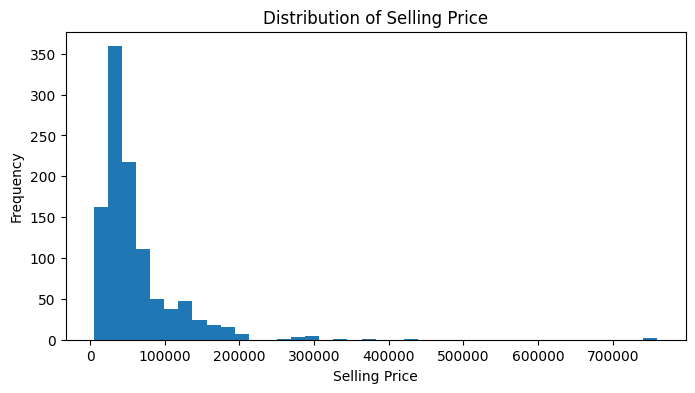

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [6]:
#3. Plot the distribution of selling prices using a histogram and describe the overall trend.


df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
plt.figure(figsize=(8,4))
plt.hist(df['selling_price'], bins=40)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()
df['selling_price'].describe()

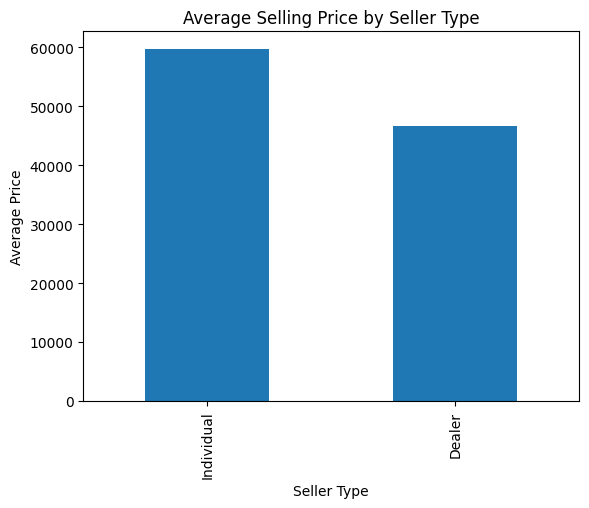

,selling_price
seller_type,
Individual,59711.923223
Dealer,46666.666667


In [7]:
#4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
avg_by_seller.plot(kind='bar', title='Average Selling Price by Seller Type', ylabel='Average Price', xlabel='Seller Type')
plt.show()
avg_by_seller

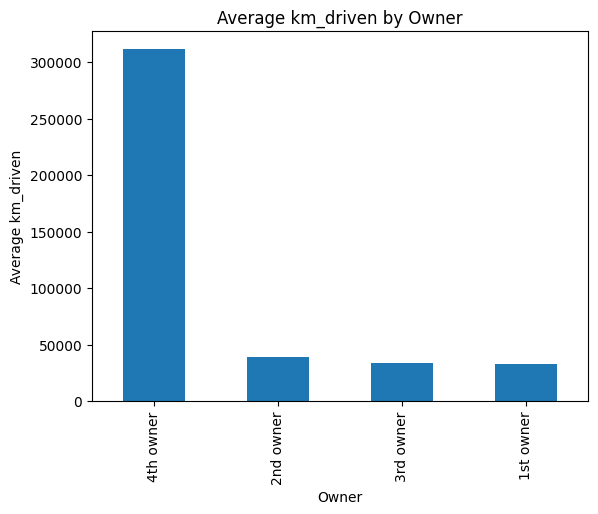

,km_driven
owner,
4th owner,311500.000000
2nd owner,39288.991870
3rd owner,33292.181818
1st owner,32816.583333


In [8]:
#5.  Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
avg_km = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)
avg_km.plot(kind='bar', title='Average km_driven by Owner', ylabel='Average km_driven', xlabel='Owner')
plt.show()
avg_km

In [9]:
#6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

before = df['km_driven'].describe()
df_no_out = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
after = df_no_out['km_driven'].describe()

print("Before:\n", before, "\n\nAfter removing outliers:\n", after)
print(f"Outliers removed: {len(df) - len(df_no_out)}")


Before:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64
Outliers removed: 39


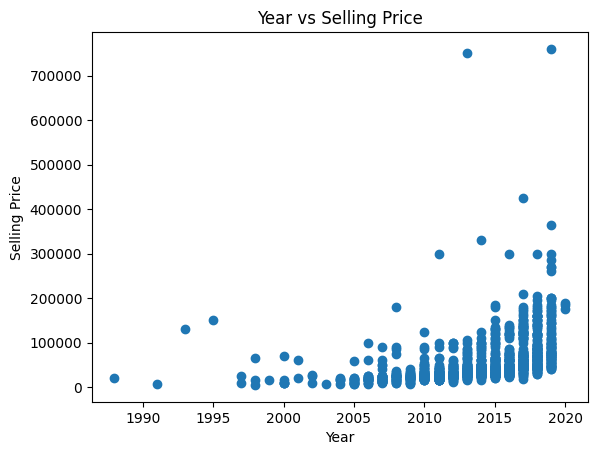

Correlation between year and selling_price: 0.40218840061476036


In [10]:
#7.  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

df['year'] = pd.to_numeric(df['year'], errors='coerce')
plt.scatter(df['year'], df['selling_price'])
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

corr = df[['year','selling_price']].corr().iloc[0,1]
print("Correlation between year and selling_price:", corr)

In [11]:
#8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_ohe = pd.get_dummies(df, columns=['seller_type'], prefix='seller')
df_ohe.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


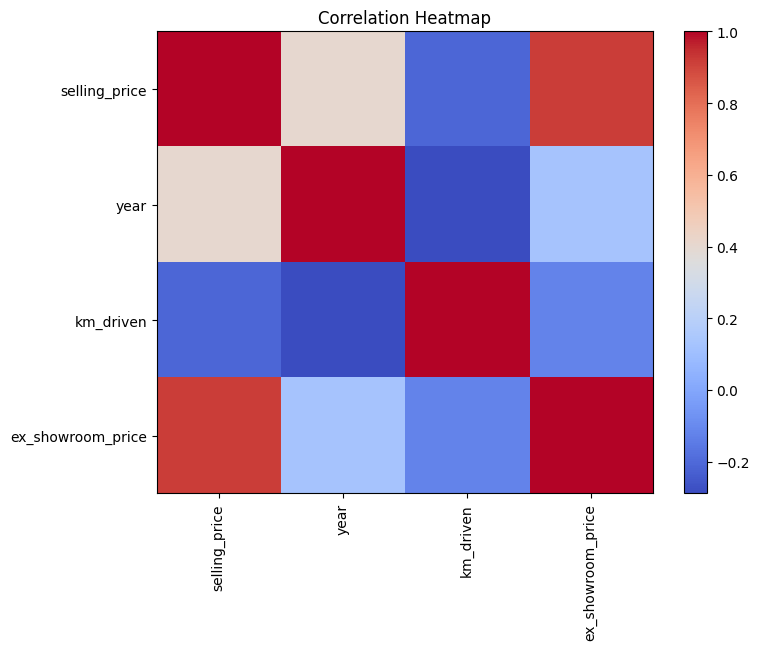

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


In [12]:
#9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

corr

10.  Summarize your findings in a brief report: What are the most important factors affecting a bike's selling price?Mention any data cleaning or feature engineering you performed
     - Selling price distribution is right-skewed with more lower-priced bikes. Newer bikes (higher year) generally sell for higher prices (corr ≈ 0.40).km_driven had several outliers that were removed using IQR.Strongest correlation: selling_price ↔ ex_showroom_price (0.92). Data cleaning included numeric conversion, missing-value handling, IQR filtering, and one-hot encoding.